<a href="https://colab.research.google.com/github/Prasanthsrinivas/Social_network_advertisements/blob/main/Social_network_ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset - This is an incredibly simple dataset that lists customer's ages and salaries and whether or not they were persuaded by advertisements to make a purchase.

In [4]:
!pip install mlxtend

In [5]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [6]:
# data collection
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [8]:
df.shape # check om no.of rows and columns

(400, 3)

In [9]:
df.isnull().sum() # checking for null values

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
# droping duplicates
df=df.drop_duplicates()
df.shape

(367, 3)

In [11]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              367 non-null    int64
 1   EstimatedSalary  367 non-null    int64
 2   Purchased        367 non-null    int64
dtypes: int64(3)
memory usage: 11.5 KB


In [13]:
df.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: xlabel='Age'>

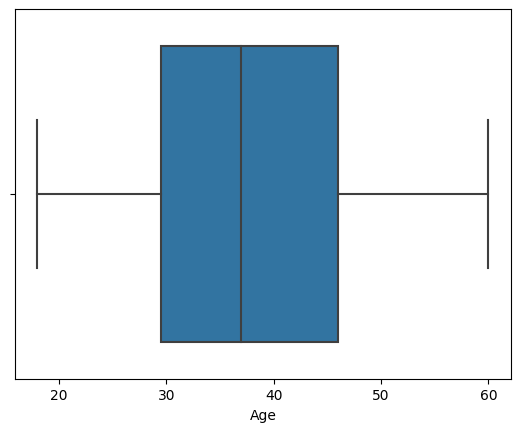

In [14]:
# checking for outliers using boxplot for all the columns
sns.boxplot(x="Age",data=df)

no outliers dectected

<Axes: xlabel='EstimatedSalary'>

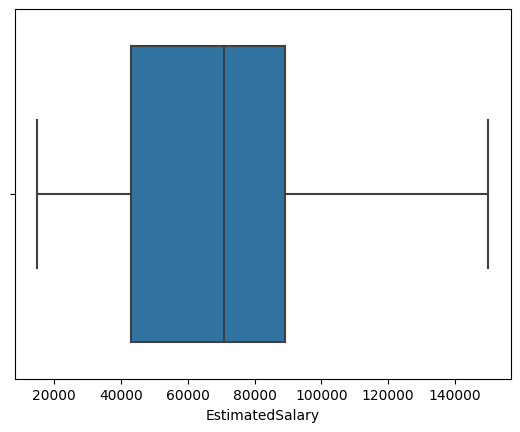

In [15]:
sns.boxplot(x="EstimatedSalary",data=df)

no outliers dectected

(*or*) using iqr method

In [16]:
# IQR method is used find the threshold values
iqr=df.Age.quantile(0.75)-df.Age.quantile(0.25)
upperthreshold=df.Age.quantile(0.75)+(1.5*iqr)
lowerthreshold=df.Age.quantile(0.25)-(1.5*iqr)
upperthreshold,lowerthreshold

(70.75, 4.75)

In [17]:
iqr=df.EstimatedSalary.quantile(0.75)-df.EstimatedSalary.quantile(0.25)
upperthreshold=df.EstimatedSalary.quantile(0.75)+(1.5*iqr)
lowerthreshold=df.EstimatedSalary.quantile(0.25)-(1.5*iqr)
upperthreshold,lowerthreshold

(158000.0, -26000.0)

In [18]:
# total counts of target classes
target=df["Purchased"].value_counts()

<Axes: title={'center': 'targetcounts'}>

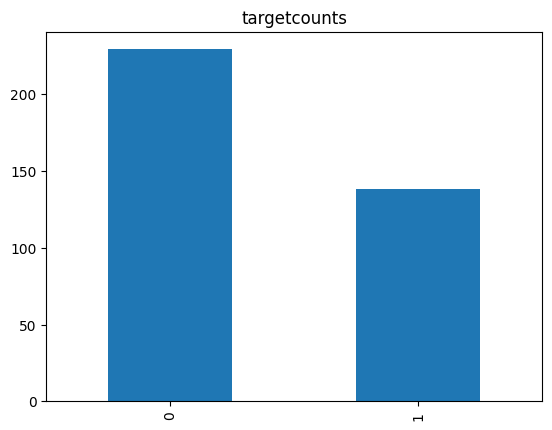

In [19]:
target.plot(kind="bar",title="targetcounts")

In [20]:
#splitting
from sklearn.model_selection import train_test_split
x=df[["Age","EstimatedSalary"]].values
y=df["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape

((293, 2), (74, 2))

In [21]:
y_train.shape,y_test.shape

((293,), (74,))

In [22]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [23]:
#model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
np.mean(cross_val_score(knn,x_train,y_train,cv=10))

0.8906896551724138

In [27]:
#  comparing models to find best hyper parameter
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn=KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print("k-value",i," acc-score : ",knn.score(x_train,y_train)," cross-val-score : ",np.mean(cross_val_score(knn,x_train,y_train,cv=10)))

k-value 1  acc-score :  0.9931740614334471  cross-val-score :  0.8324137931034482
k-value 2  acc-score :  0.9044368600682594  cross-val-score :  0.8226436781609194
k-value 3  acc-score :  0.9283276450511946  cross-val-score :  0.8875862068965518
k-value 4  acc-score :  0.9112627986348123  cross-val-score :  0.8909195402298851
k-value 5  acc-score :  0.9249146757679181  cross-val-score :  0.8906896551724138
k-value 6  acc-score :  0.9112627986348123  cross-val-score :  0.8839080459770114
k-value 7  acc-score :  0.9112627986348123  cross-val-score :  0.8941379310344828
k-value 8  acc-score :  0.9146757679180887  cross-val-score :  0.8906896551724138
k-value 9  acc-score :  0.9078498293515358  cross-val-score :  0.8975862068965517
k-value 10  acc-score :  0.9112627986348123  cross-val-score :  0.8975862068965517
k-value 20  acc-score :  0.9044368600682594  cross-val-score :  0.904367816091954
k-value 50  acc-score :  0.9044368600682594  cross-val-score :  0.8805747126436781


Here K=20 has the highest cross validation score and k=20 is best hyper parameter

k-value 1  acc-score :  0.9931740614334471  cross-val-score :  0.8324137931034482


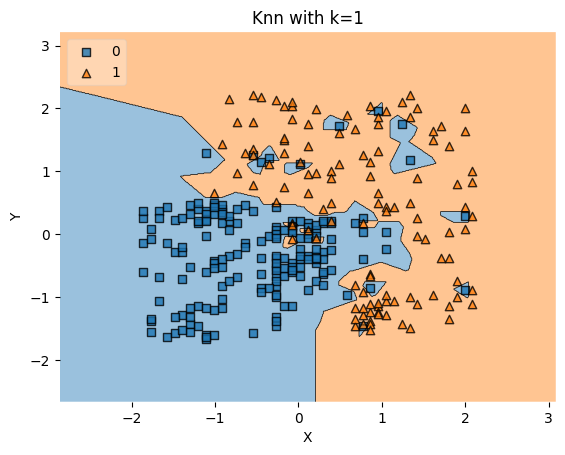

k-value 2  acc-score :  0.9044368600682594  cross-val-score :  0.8226436781609194


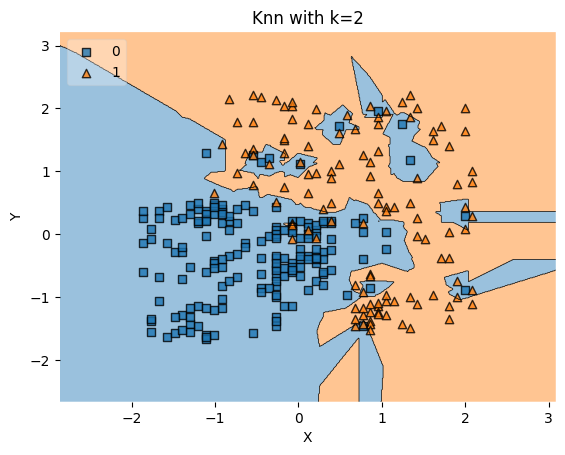

k-value 3  acc-score :  0.9283276450511946  cross-val-score :  0.8875862068965518


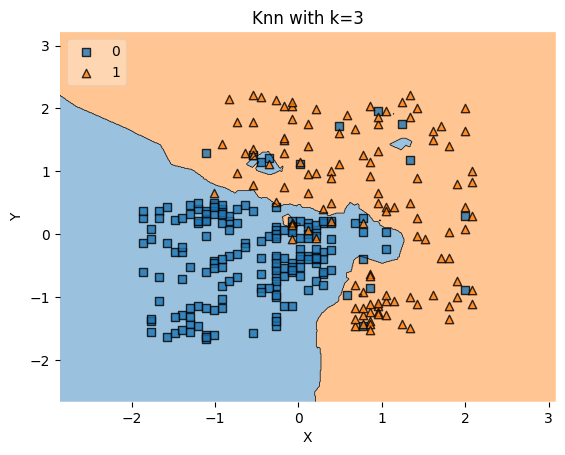

k-value 4  acc-score :  0.9112627986348123  cross-val-score :  0.8909195402298851


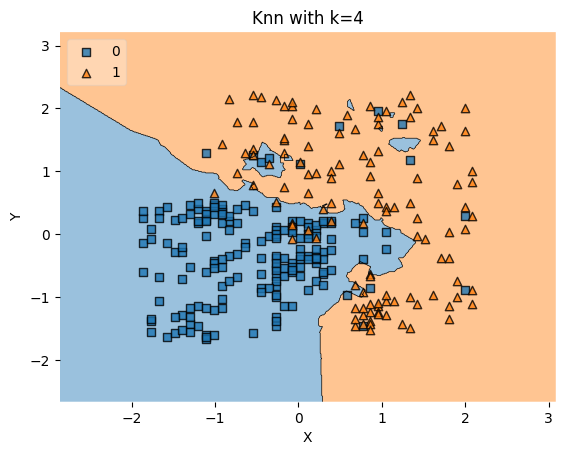

k-value 5  acc-score :  0.9249146757679181  cross-val-score :  0.8906896551724138


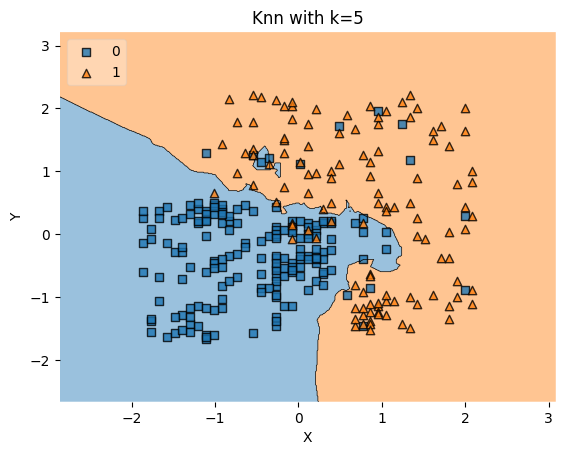

k-value 6  acc-score :  0.9112627986348123  cross-val-score :  0.8839080459770114


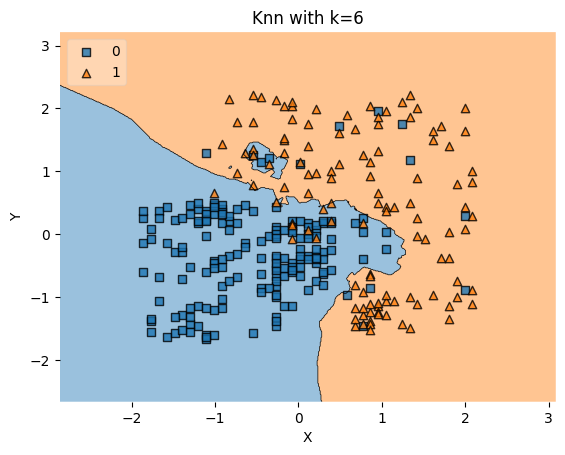

k-value 7  acc-score :  0.9112627986348123  cross-val-score :  0.8941379310344828


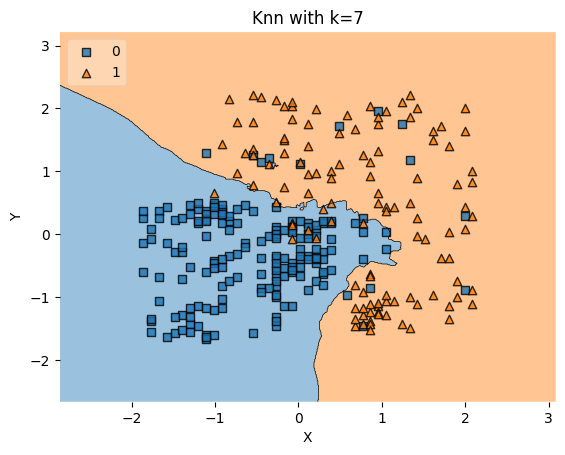

k-value 8  acc-score :  0.9146757679180887  cross-val-score :  0.8906896551724138


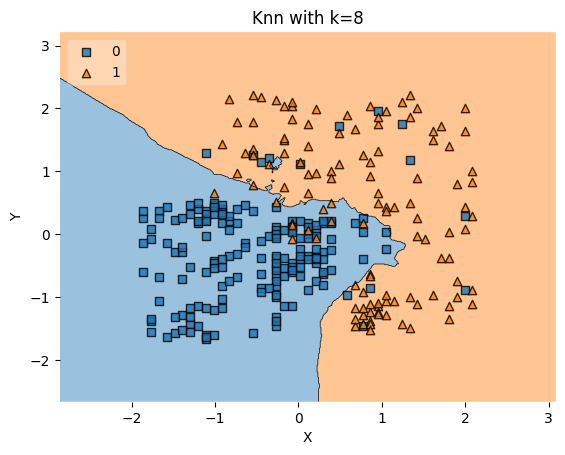

k-value 9  acc-score :  0.9078498293515358  cross-val-score :  0.8975862068965517


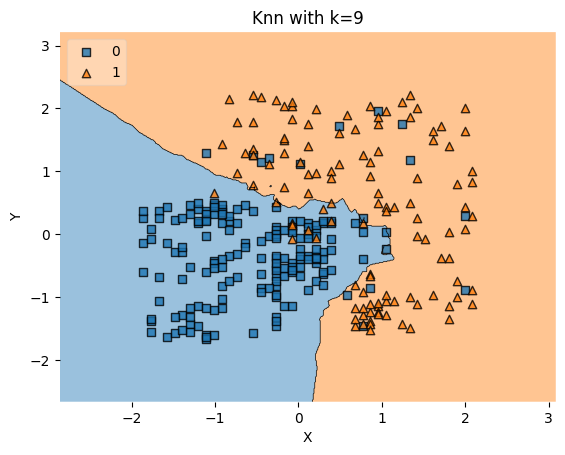

k-value 10  acc-score :  0.9112627986348123  cross-val-score :  0.8975862068965517


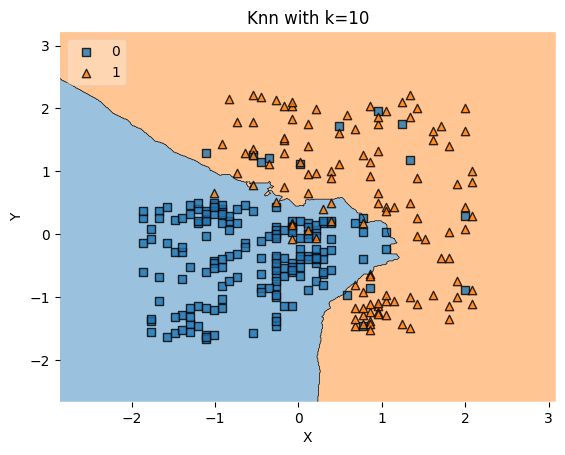

k-value 20  acc-score :  0.9044368600682594  cross-val-score :  0.904367816091954


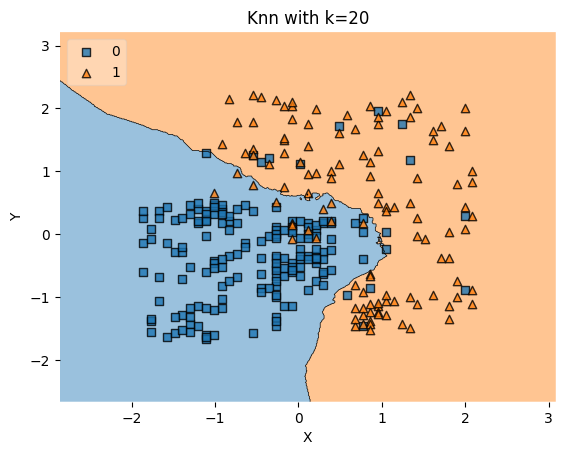

k-value 50  acc-score :  0.9044368600682594  cross-val-score :  0.8805747126436781


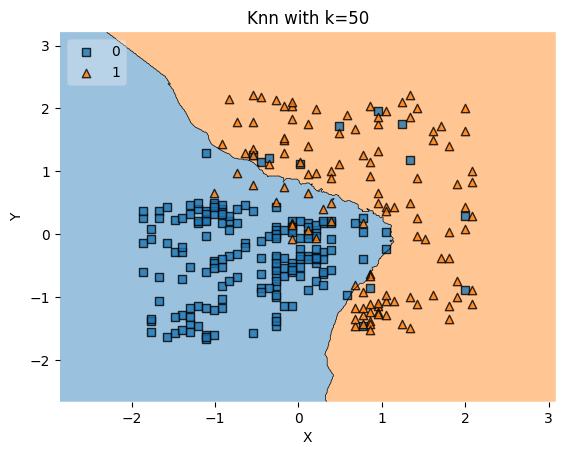

In [28]:

for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn=KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print("k-value",i," acc-score : ",knn.score(x_train,y_train)," cross-val-score : ",np.mean(cross_val_score(knn,x_train,y_train,cv=10)))
  plot_decision_regions(x_train,y_train.to_numpy(), clf=knn,legend=2)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Knn with k="+str(i))
  plt.show()





In the above diagram if a new data points comes into blue shaded region means it is class 0 AND
if a new data points comes into orange shaded region means it is class 1

In [29]:
print(knn.predict(scaler.transform([[30,87000]])))

[0]


In [30]:
knn.predict(scaler.transform([[25,20000]]))

array([0])

In [31]:
knn.predict(scaler.transform([[60,60000]]))

array([1])

In [32]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1])

0.8783783783783784

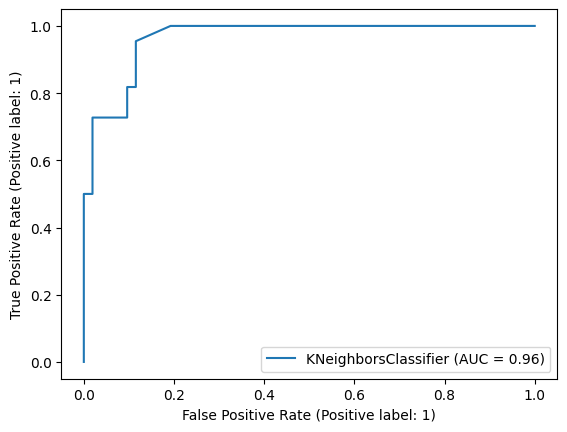

In [33]:
#metrics-it is a classification problem so choose accuracy ,f1 score,auroc
from sklearn.metrics import accuracy_score,f1_score,RocCurveDisplay
RocCurveDisplay.from_estimator(knn,x_test,y_test)
accuracy_score(y_test,y_pred)

AUROC-0.96 --> ie our model performing very good
Auroc score ranges from 0 to 1